<a href="https://colab.research.google.com/github/nikita-1095/EDA-Telecom-Churn-Analysis/blob/main/Nikita_W_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')


In [5]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [6]:
df = pd.read_csv("/content/gdrive/My Drive/Alma DS/Telecom Churn.csv",engine='python')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.shape

(3333, 20)

In [10]:
df.columns.values

array(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'], dtype=object)

In [11]:
df.drop('State',axis='columns')

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [13]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# Cleaning the Dataset

In [14]:
# Get the count of null values in each column
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

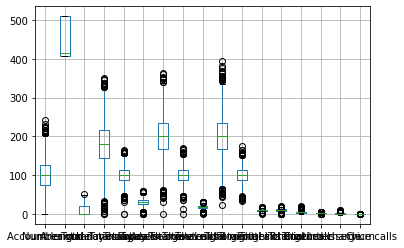

In [15]:
df.boxplot()

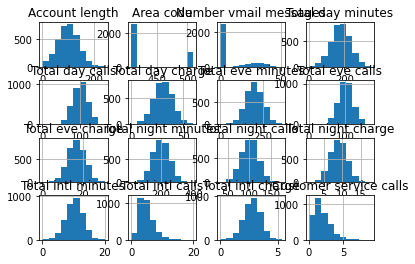

In [16]:
df.hist();

In [17]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [18]:
#Removing missing values 
df.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = df.iloc[:,1:]
#Converting the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,11.01,10.0,3,2.70,1,False,1,0,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,11.45,13.7,3,3.70,1,False,1,0,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,7.32,12.2,5,3.29,0,False,1,0,1,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,8.86,6.6,7,1.78,2,False,0,1,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,8.41,10.1,3,2.73,3,False,0,1,1,0


In [19]:
#Display randomly selected 5 rows of the dataset
df.sample(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2524,VA,106,415,No,No,0,235.2,121,39.98,220.6,87,18.75,236.3,91,10.63,11.8,4,3.19,1,False
3184,NC,72,415,No,No,0,196.5,88,33.41,158.6,129,13.48,269.3,118,12.12,6.8,3,1.84,0,False
594,WV,90,415,No,No,0,205.7,138,34.97,161.9,83,13.76,269.7,104,12.14,12.5,6,3.38,2,False
1028,KS,70,415,No,No,0,222.8,114,37.88,215.9,113,18.35,223.5,122,10.06,0.0,0,0.00,1,False
2087,NE,105,408,No,No,0,162.3,99,27.59,212.5,95,18.06,214.7,114,9.66,11.1,8,3.00,4,False


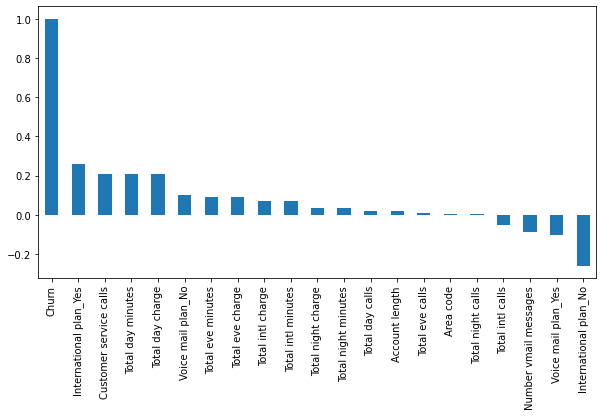

In [20]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(10,5))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [21]:
# create the categorial columns 
categorial1=df.select_dtypes(include=['object'])
categorial1.head()


,State,International plan,Voice mail plan
0,KS,No,Yes
1,OH,No,Yes
2,NJ,No,No
3,OH,Yes,No
4,OK,Yes,No


In [23]:
#create for loop to print distinct values from the columns
for col in categorial1:
   print(f'Distinct values in categorial columns {col} are:{categorial1[col].unique()}')

Distinct values in categorial columns State are:['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
Distinct values in categorial columns International plan are:['No' 'Yes']
Distinct values in categorial columns Voice mail plan are:['Yes' 'No']


Text(0.5, 1.0, 'duplicate rows in dataset')

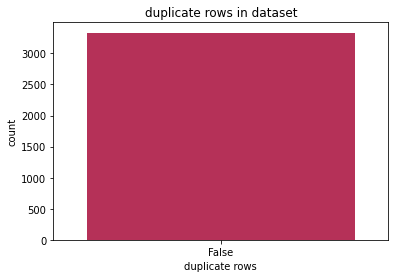

In [24]:
#duplicate rows 
plt.figure(figsize=(6,4))
sns.countplot(x=df.duplicated(),palette='rocket')
plt.xlabel('duplicate rows')
plt.ylabel('count')
plt.title('duplicate rows in dataset')

In [25]:
#dropping of the duplicate rows
df.drop_duplicates(inplace=True)

In [26]:
#create dataframe of numerical columns
numerical_df1 = df._get_numeric_data()
numerical_df1.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [27]:
#create for loop to print unique values in numerical columns
for col in numerical_df1:
  print(f'Unique values in numerical columns {col} are: {numerical_df1[col].unique()[:5]}')

Unique values in numerical columns Account length are: [128 107 137  84  75]
Unique values in numerical columns Area code are: [415 408 510]
Unique values in numerical columns Number vmail messages are: [25 26  0 24 37]
Unique values in numerical columns Total day minutes are: [265.1 161.6 243.4 299.4 166.7]
Unique values in numerical columns Total day calls are: [110 123 114  71 113]
Unique values in numerical columns Total day charge are: [45.07 27.47 41.38 50.9  28.34]
Unique values in numerical columns Total eve minutes are: [197.4 195.5 121.2  61.9 148.3]
Unique values in numerical columns Total eve calls are: [ 99 103 110  88 122]
Unique values in numerical columns Total eve charge are: [16.78 16.62 10.3   5.26 12.61]
Unique values in numerical columns Total night minutes are: [244.7 254.4 162.6 196.9 186.9]
Unique values in numerical columns Total night calls are: [ 91 103 104  89 121]
Unique values in numerical columns Total night charge are: [11.01 11.45  7.32  8.86  8.41]
Uni

# Taking Necessary Columns Only

In [28]:
# Fetch Columns
new_df = df[['State','Account length', 'Area code','Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes',
             'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls',
             'Total intl charge', 'Customer service calls']]
new_df.head(5)

,State,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,KS,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


# 1. Find out the top 5 states where the maximum total evening charges are occured with thier account lenghts.

In [29]:
# Fetch State, Account length with Total eve charge
hosts_state = df.groupby(['State','Account length'])['Total eve charge'].max().reset_index()
hosts_state.sort_values(by='Total eve charge', ascending=False).head(5)


,State,Account length,Total eve charge
1418,NC,130,30.91
726,IN,46,30.75
1005,MD,102,30.11
904,LA,117,29.89
131,AR,99,29.83


# 2. Find out the top 5 states where the maximum total night charges are occured with thier account lenghts.

In [30]:
# Fetch State, Account length with Total night charge
hosts_state = df.groupby(['State','Account length'])['Total night charge'].max().reset_index()
hosts_state.sort_values(by='Total night charge', ascending=False).head(5)

,State,Account length,Total night charge
2375,VA,172,17.77
1506,NE,89,17.19
625,ID,55,16.99
147,AR,153,16.55
508,GA,73,16.42


# 3. Find out the top 5 states where the maximum total intl charges are occured with thier account lenghts.

In [31]:
# Fetch State, Account length with Total intl charge
hosts_state = df.groupby(['State','Account length'])['Total intl charge'].max().reset_index()
hosts_state.sort_values(by='Total intl charge', ascending=False).head(5)

,State,Account length,Total intl charge
1042,ME,36,5.40
659,ID,128,5.10
1924,OR,53,4.97
660,ID,130,4.94
1535,NE,194,4.91


# 4. Find out the top 5 states where the maximum total evening charges are occured with thier account lenghts.

In [32]:
# Fetch State, Account length with Total eve charge
hosts_state = df.groupby(['State','Account length'])['Total eve charge'].max().reset_index()
hosts_state.sort_values(by='Total eve charge', ascending=False).head(5)

,State,Account length,Total eve charge
1418,NC,130,30.91
726,IN,46,30.75
1005,MD,102,30.11
904,LA,117,29.89
131,AR,99,29.83


# 5. Plot a graph which shows the variations of total evening charges according to the states.

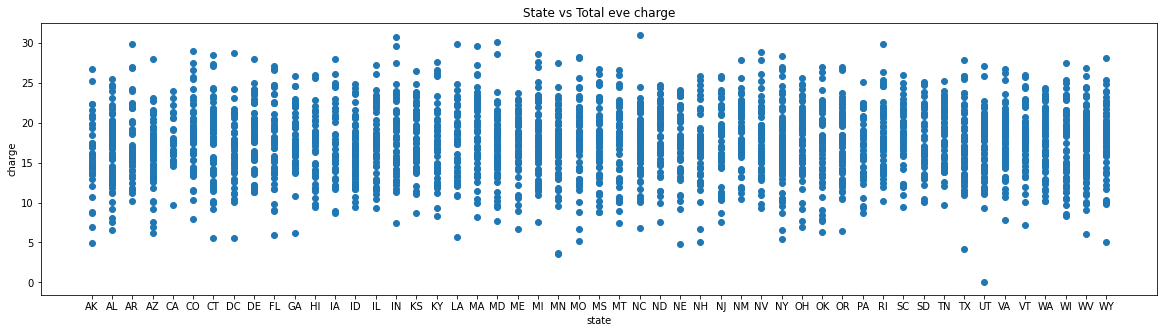

In [33]:
#Plot the bar graph
state = hosts_state['State']
charge = hosts_state['Total eve charge']

fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.scatter(state, charge)
 
plt.xlabel("state")
plt.ylabel("charge")
plt.title("State vs Total eve charge")
plt.show()

# 6. Detect the top 10 busiest states at night along with thier tatal night minutes ,calls and charges

In [34]:
# Fetch The busiest  at night
night_user = df.groupby(['State','Total night minutes','Total night calls'])['Total night charge'].max().reset_index()
night_user = night_user.sort_values(by='Total night charge', ascending=False).head(10)
night_user

,State,Total night minutes,Total night calls,Total night charge
2932,VA,395.0,72,17.77
1876,NE,381.9,147,17.19
826,ID,377.5,114,16.99
186,AR,367.7,89,16.55
656,GA,364.9,106,16.42
3149,WI,364.3,106,16.39
2931,VA,354.9,75,15.97
2289,OH,352.5,111,15.86
1135,LA,352.2,95,15.85
955,IN,350.2,108,15.76


# 7. Plot two different graphs for night and day users according to their required charges and later on compare both charges for night and day users.

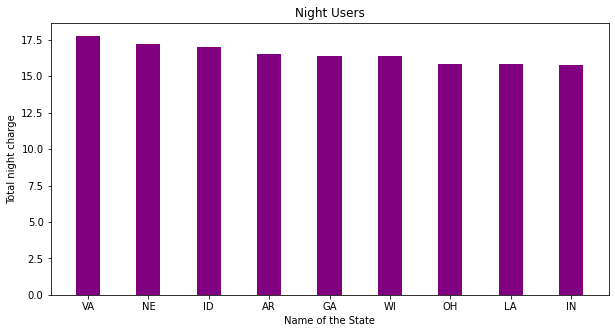

In [35]:
#create the bar graph
state = night_user['State']
charge = night_user['Total night charge']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(state, charge, color ='purple',
        width = 0.4)
 
plt.xlabel("Name of the State")
plt.ylabel("Total night charge")
plt.title("Night Users")
plt.show()

In [36]:
# Fetch The busiest  at day
day_user = df.groupby(['State','Total day minutes','Total day calls'])['Total day charge'].max().reset_index()
day_user = day_user.sort_values(by='Total day charge', ascending=False).head(10)
day_user

,State,Total day minutes,Total day calls,Total day charge
350,CO,350.8,75,59.64
2208,NY,346.8,55,58.96
2286,OH,345.3,81,58.70
2285,OH,337.4,120,57.36
1550,MO,335.5,77,57.04
539,DE,334.3,118,56.83
2207,NY,332.9,67,56.59
2347,OK,329.8,73,56.07
2654,SD,328.1,106,55.78
2779,TX,326.5,67,55.51


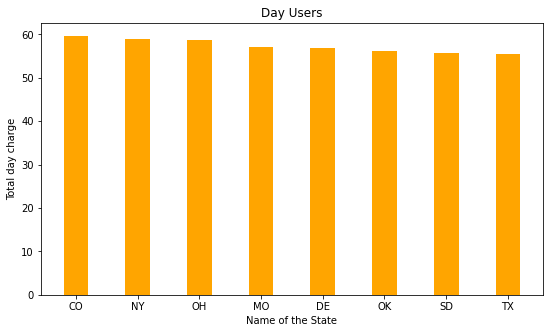

In [37]:
#create the bar graph
state = day_user['State']
charge = day_user['Total day charge']

fig = plt.figure(figsize = (9, 5))
 
# creating the bar plot
plt.bar(state, charge, color ='orange',
        width = 0.4)
 
plt.xlabel("Name of the State")
plt.ylabel("Total day charge")
plt.title("Day Users")
plt.show()

# comparing both night and day users 

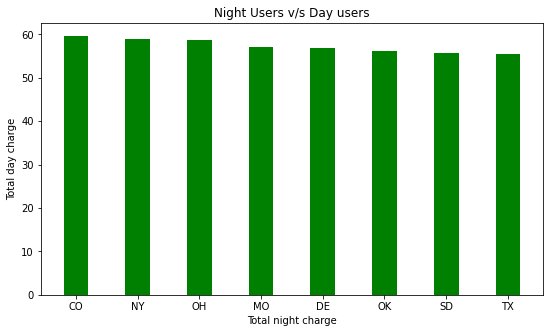

In [41]:
#create the bar graph
charge = night_user['Total night charge']
charge = day_user['Total day charge']

fig = plt.figure(figsize = (9, 5))
 
# creating the bar plot
plt.bar(state, charge, color ='green',
        width = 0.4)
 
plt.xlabel("Total night charge")
plt.ylabel("Total day charge")
plt.title("Night Users v/s Day users")
plt.show()

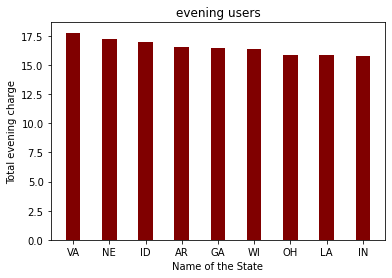

In [ ]:
#create the bar graph
state = night_user['State']
charge = night_user['Total night charge']

fig = plt.figure(figsize = (6, 4))
 
# creating the bar plot
plt.bar(state, charge, color ='maroon',
        width = 0.4)
 
plt.xlabel("Name of the State")
plt.ylabel("Total evening charge")
plt.title("evening users")
plt.show()

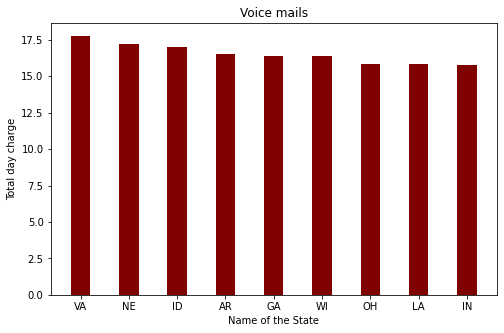

In [ ]:
#create the bar graph
state = night_user['State']
charge = night_user['Total night charge']

fig = plt.figure(figsize = (8, 5))
 
# creating the bar plot
plt.bar(state, charge, color ='maroon',
        width = 0.4)
 
plt.xlabel("Name of the State")
plt.ylabel("Total day charge")
plt.title("Voice mails")
plt.show()

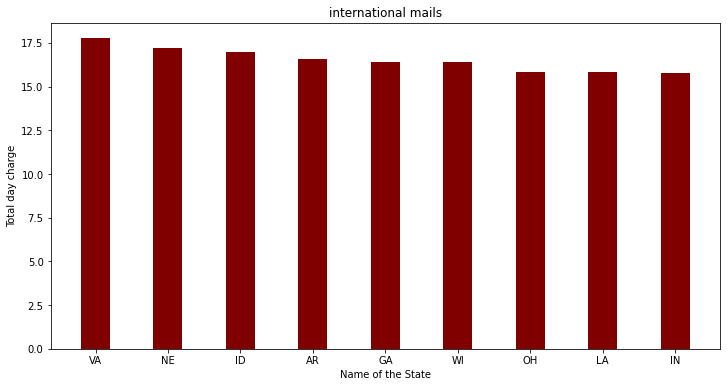

In [ ]:
#create the bar graph
state = night_user['State']
charge = night_user['Total night charge']

fig = plt.figure(figsize = (12, 6))
 
# creating the bar plot
plt.bar(state, charge, color ='maroon',
        width = 0.4)
 
plt.xlabel("Name of the State")
plt.ylabel("Total day charge")
plt.title("international mails")
plt.show()

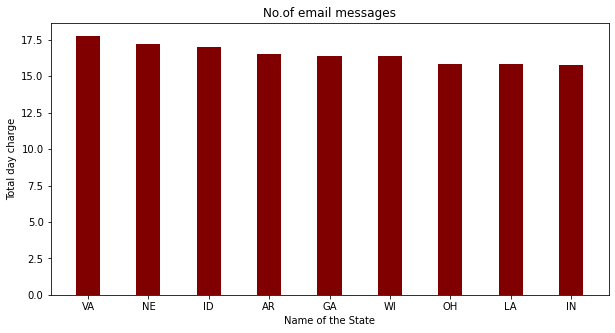

In [ ]:
#create the bar graph
state = night_user['State']
charge = night_user['Total night charge']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(state, charge, color ='maroon',
        width = 0.4)
 
plt.xlabel("Name of the State")
plt.ylabel("Total day charge")
plt.title("No.of email messages")
plt.show()

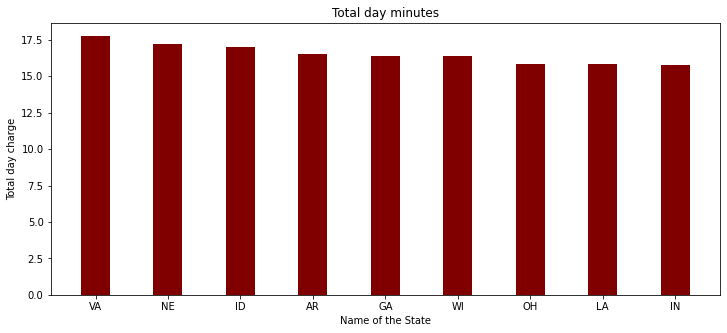

In [ ]:
#create the bar graph
state = night_user['State']
charge = night_user['Total night charge']

fig = plt.figure(figsize = (12, 5))
 
# creating the bar plot
plt.bar(state, charge, color ='maroon',
        width = 0.4)
 
plt.xlabel("Name of the State")
plt.ylabel("Total day charge")
plt.title("Total day minutes")
plt.show()

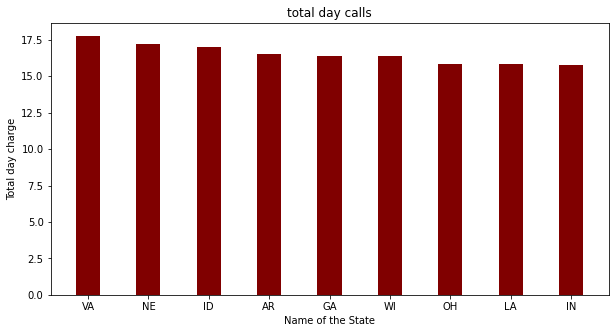

In [ ]:
#create the bar graph
state = night_user['State']
charge = night_user['Total night charge']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(state, charge, color ='maroon',
        width = 0.4)
 
plt.xlabel("Name of the State")
plt.ylabel("Total day charge")
plt.title("total day calls")
plt.show()

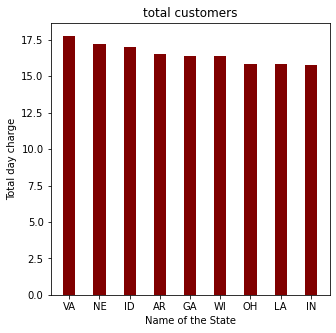

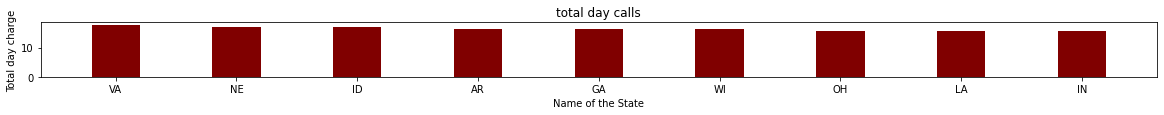

In [ ]:
#create the bar graph
state = night_user['State']
charge = night_user['Total night charge']

fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(state, charge, color ='maroon',
        width = 0.4)
 
plt.xlabel("Name of the State")
plt.ylabel("Total day charge")
plt.title("total customers")
plt.show()#create the bar graph
state = night_user['State']
charge = night_user['Total night charge']

fig = plt.figure(figsize = (20, 1))
 
# creating the bar plot
plt.bar(state, charge, color ='maroon',
        width = 0.4)
 
plt.xlabel("Name of the State")
plt.ylabel("Total day charge")
plt.title("total day calls")
plt.show()

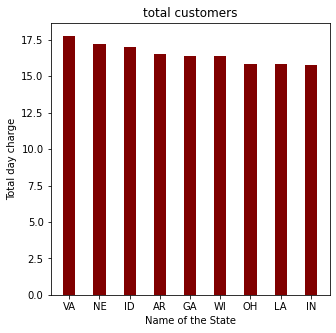

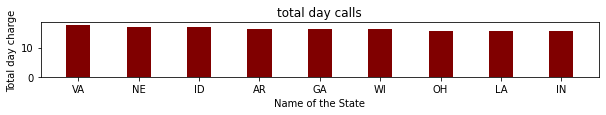

In [ ]:
#create the bar graph
state = night_user['State']
charge = night_user['Total night charge']

fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(state, charge, color ='maroon',
        width = 0.4)
 
plt.xlabel("Name of the State")
plt.ylabel("Total day charge")
plt.title("total customers")
plt.show()#create the bar graph
state = night_user['State']
charge = night_user['Total night charge']

fig = plt.figure(figsize = (10, 1))
 
# creating the bar plot
plt.bar(state, charge, color ='maroon',
        width = 0.4)
 
plt.xlabel("Name of the State")
plt.ylabel("Total day charge")
plt.title("total day calls")
plt.show()

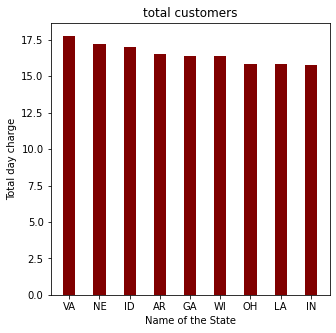

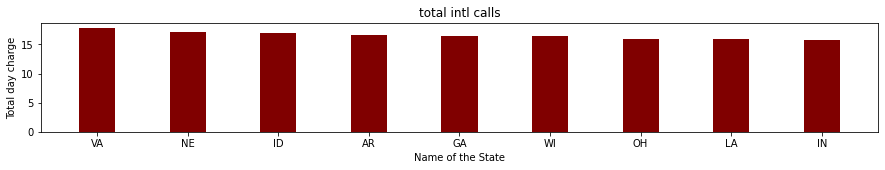

In [ ]:
#create the bar graph
state = night_user['State']
charge = night_user['Total night charge']

fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(state, charge, color ='maroon',
        width = 0.4)
 
plt.xlabel("Name of the State")
plt.ylabel("Total day charge")
plt.title("total customers")
plt.show()#create the bar graph
state = night_user['State']
charge = night_user['Total night charge']

fig = plt.figure(figsize = (15, 2))
 
# creating the bar plot
plt.bar(state, charge, color ='maroon',
        width = 0.4)
 
plt.xlabel("Name of the State")
plt.ylabel("Total day charge")
plt.title("total intl calls")
plt.show()

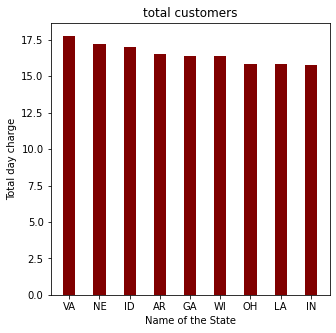

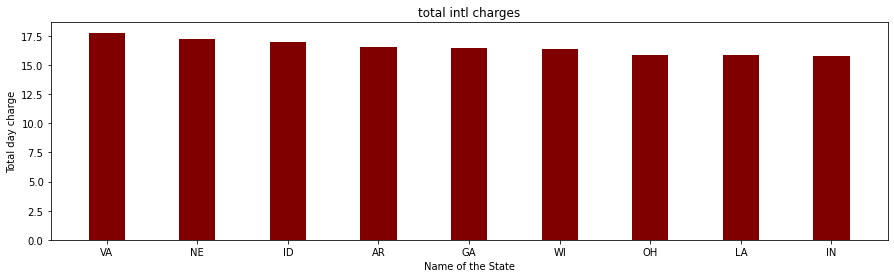

In [ ]:
#create the bar graph
state = night_user['State']
charge = night_user['Total night charge']

fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(state, charge, color ='maroon',
        width = 0.4)
 
plt.xlabel("Name of the State")
plt.ylabel("Total day charge")
plt.title("total customers")
plt.show()#create the bar graph
state = night_user['State']
charge = night_user['Total night charge']

fig = plt.figure(figsize = (15, 4))
 
# creating the bar plot
plt.bar(state, charge, color ='maroon',
        width = 0.4)
 
plt.xlabel("Name of the State")
plt.ylabel("Total day charge")
plt.title("total intl charges")
plt.show()

In [ ]:
df['Voice mail plan'][0]

'Yes'

In [ ]:
df['Number vmail messages'].sum()

26994

In [ ]:
df['Total day minutes'].mean()

179.77509750975094

In [ ]:
df['Total day calls'].mean()

100.43564356435644

In [ ]:
df['Total day charge'].mean()

30.562307230723075

In [ ]:
df['Total eve charge'].mean()

17.083540354035403

In [ ]:
df['Total night charge'].mean()

9.03932493249325

In [ ]:
df['Total intl charge'].mean()

2.7645814581458144

In [ ]:
df['Customer service calls'].sum()

5209

In [ ]:
df['Customer service calls'].max()

9

In [ ]:
df['Customer service calls'].mean()

1.5628562856285628

In [ ]:
df['Churn'].sum()

483

In [ ]:
df.loc[(df['Churn']==True)]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,True
3304,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True
3320,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True


In [ ]:
df.sort_values('Account length',ascending=True) 

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
923,MS,1,415,No,No,0,144.8,107,24.62,112.5,66,9.56,218.7,79,9.84,13.8,3,3.73,1,False
1838,IA,1,408,No,Yes,26,208.0,115,35.36,185.0,113,15.73,177.7,144,8.00,8.1,9,2.19,1,False
1490,TN,1,415,No,No,0,196.1,107,33.34,296.5,82,25.20,211.5,91,9.52,7.0,2,1.89,1,False
2960,TX,1,415,No,No,0,182.1,106,30.96,134.9,106,11.47,152.3,75,6.85,10.0,3,2.70,5,True
2423,SC,1,408,No,No,0,123.8,113,21.05,236.2,77,20.08,73.2,81,3.29,3.7,2,1.00,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,ID,224,510,No,No,0,111.4,133,18.94,175.0,66,14.88,217.2,106,9.77,5.5,6,1.49,3,False
1751,WY,225,415,No,No,0,182.7,142,31.06,246.5,63,20.95,218.0,103,9.81,8.8,2,2.38,1,False
1551,MI,225,415,No,No,0,165.4,106,28.12,273.7,109,23.26,210.0,93,9.45,8.7,3,2.35,0,True
1408,NM,232,408,No,No,0,165.6,104,28.15,195.9,115,16.65,118.3,77,5.32,11.8,3,3.19,1,False


In [ ]:
df.sort_values('Customer service calls',ascending=False) 


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
542,MN,152,415,Yes,Yes,20,237.5,120,40.38,253.4,94,21.54,265.2,80,11.93,14.2,3,3.83,9,True
2380,NJ,53,408,No,No,0,228.6,117,38.86,132.8,123,11.29,227.2,124,10.22,10.1,2,2.73,9,True
1502,SC,64,510,No,Yes,40,210.0,116,35.70,232.7,89,19.78,168.8,94,7.60,5.9,4,1.59,8,False
1912,NH,103,408,No,No,0,150.6,125,25.60,169.1,126,14.37,221.2,104,9.95,10.4,8,2.81,8,True
902,HI,149,510,No,No,0,166.6,61,28.32,218.8,107,18.60,208.3,131,9.37,8.2,6,2.21,7,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,IL,137,408,Yes,No,0,237.3,103,40.34,176.7,84,15.02,263.4,81,11.85,14.2,4,3.83,0,True
806,WV,137,408,No,No,0,174.4,120,29.65,156.3,98,13.29,136.5,121,6.14,10.2,5,2.75,0,False
805,AL,83,408,No,No,0,202.3,87,34.39,201.5,111,17.13,101.7,82,4.58,6.8,4,1.84,0,False
804,MT,72,415,No,No,0,253.0,73,43.01,219.3,78,18.64,210.8,89,9.49,9.8,4,2.65,0,False


In [ ]:
df.loc[df['Churn']==True]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,True
3304,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True
3320,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True


In [ ]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [ ]:
df['Churn'].sum()

483

In [ ]:
df['Churn'].mean()

0.14491449144914492